# A simple demo of applying SVD for image compression

# Author: March J. Luo

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

# Loading original image

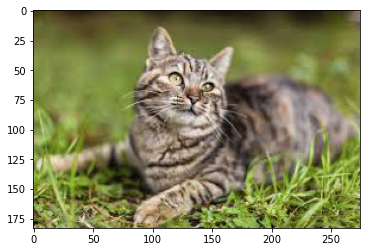

In [5]:
rgb = image.imread('cat.jpeg')

plt.imshow(rgb)
plt.show()

# Converting RGB to gray-scale image

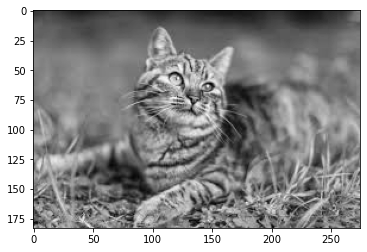

In [8]:
r = rgb[:,:,0] / 255
g = rgb[:,:,1] / 255
b = rgb[:,:,2] / 255

gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [34]:
gray.shape

(183, 275)

# SVD decomposing

In [32]:
u, sigma, vt = np.linalg.svd(gray)

In [15]:
n_sigma = len(sigma)

# Singular value distribution

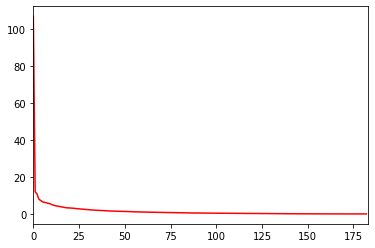

In [16]:
plt.plot(sigma, c = 'red')

plt.xlim([0, n_sigma])

plt.show()

# Recreating image by using k components

In [38]:
# Recreating the image by keeping up to the p percentage
# of the sigmas
def recreate_image(u, sigma, vt, p):
    
    # image size
    m = len(u)
    n = len(v)

    #print(f"m={m} n={n}")

    sigma_ = np.zeros((m,n))
    sigma_total = sum(sigma) + 1e-8
    sigma_cur = 0.0 + 1e-8
    
    for i in range(len(sigma)):
        sigma_[i,i] = sigma[i]
        
        sigma_cur += sigma[i]
        
        if sigma_cur / sigma_total > p:
            break
    
    image_ = u @ sigma_ @ vt
    
    return image_

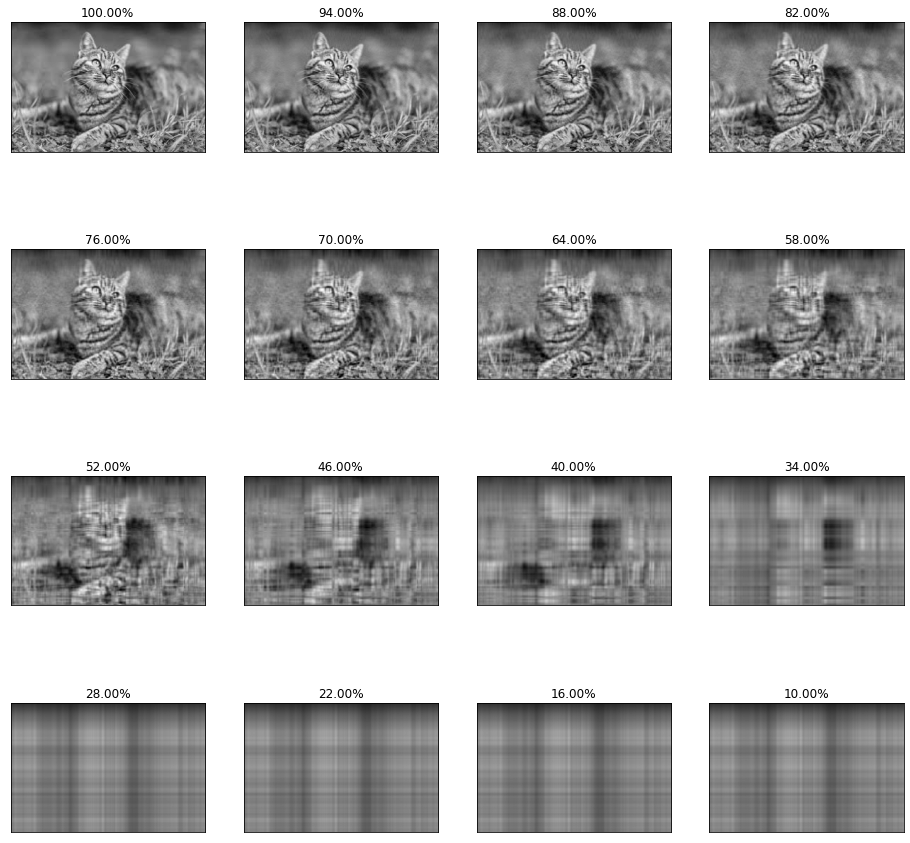

In [42]:
nrows = 4
ncols = 4
subfig_width = 4
subfig_height = 4
figsize = (ncols * subfig_width, nrows * subfig_height)

fig, axes = plt.subplots(nrows = nrows,
                         ncols = ncols,
                         figsize = figsize)

axes_flat = axes.flat 

percents = np.linspace(1, 0.1, num = nrows * ncols, endpoint = True)

for row in range(nrows):
    for col in range(ncols): 
        idx = row * ncols + col
        
        p = percents[idx]
        
        label = f"{p * 100:.2f}%"
        
        ax = axes_flat[idx]
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        image_ = recreate_image(u, sigma, vt, p)
        
        ax.imshow(image_, cmap = "gray", vmin = 0, vmax = 1) 
        
        ax.title.set_text(f"{label}")
  
plt.show()